# Gather 

In [1]:
import requests
import os
import tweepy
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

### Downloaded programatically: Image Predictions

In [2]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [3]:
images = pd.read_csv('image-predictions.tsv', sep = '\t')

### Local: Twitter Archive

In [4]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

### API: Full Tweet Data

In [5]:
# #Set up the ability to query the Twitter API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, 
                 wait_on_rate_limit = True,
                 wait_on_rate_limit_notify=True)

In [6]:
#Query the Twitter API using the tweet_id values from the archive.  
tweet_info = {}
for tweet_id in archive.tweet_id:
    try:
       tweet = api.get_status(tweet_id, tweet_mode = 'extended')
       tweet_info[str(tweet_id)] = tweet._json
    except:
       print("Error with ID # " + str(tweet_id))
        

In [7]:
#Save data to the tweet_json.txt file
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_info, outfile)

In [8]:
#Read tweet data into a dataframe
tweets = pd.read_json('tweet_json.txt',orient='index')

# Assess

We can assess the data both visually, and programmatically.  

### Visual Assessment

In [9]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
tweets

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
1998-04-12 22:37:23.555336193,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37868,0,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8264,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-04-10 03:03:41.306343426,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32536,0,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6106,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-04-05 22:26:21.378084864,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24495,0,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,4043,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-04-04 11:32:37.279858688,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41225,0,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8411,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-03-31 06:59:18.926688256,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39399,0,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,9110,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-03-28 12:25:50.875897856,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",19807,0,Here we have a majestic great white breaching ...,NaN,...,NaN,NaN,NaN,NaN,3027,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-03-27 04:11:53.173991426,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",11576,0,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,NaN,NaN,NaN,NaN,2002,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-03-24 08:46:21.411237888,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",63895,0,When you watch your owner call another dog a g...,NaN,...,NaN,NaN,NaN,NaN,18346,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-03-22 23:26:25.150312448,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",27214,0,This is Zoey. She doesn't want to be one of th...,NaN,...,NaN,NaN,NaN,NaN,4162,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-03-18 16:57:35.349198849,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",31217,0,This is Cassie. She is a college pup. Studying...,NaN,...,NaN,NaN,NaN,NaN,7177,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na.

### Programmatic Assessment

In [12]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
images[images.duplicated(subset='jpg_url')==True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [14]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
the            8
Sadie          8
Bailey         7
Buddy          7
Toby           7
an             7
Daisy          7
Bella          6
Rusty          6
Oscar          6
Leo            6
Dave           6
Jax            6
Jack           6
Scout          6
Koda           6
Milo           6
Stanley        6
Larry          5
            ... 
Brian          1
Aja            1
Snickers       1
Dale           1
Chevy          1
Miguel         1
Jay            1
Batdog         1
Laika          1
Jersey         1
Chesney        1
Rilo           1
Shikha         1
Enchilada      1
Taz            1
Hall           1
his            1
Grizz          1
Aubie          1
Florence       1
Lizzie         1
Maisey         1
Eriq           1
Tycho          1
Alfy           1
Cupid          1
Amélie         1
Ralphus       

In [16]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [18]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2340 entries, 1998-04-12 22:37:23.555336193 to 1991-02-08 13:48:08.022790149
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2340 non-null datetime64[ns]
display_text_range               2340 non-null object
entities                         2340 non-null object
extended_entities                2067 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null int64
full_text                        2340 non-null object
geo                              0 non-null float64
id                               2340 non-null int64
id_str                           2340 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              

# Data Wrangling


Now that we have looked over the data, there is a list of things, from observation, that should be fixed in the data.

### Quality Issues

#### Tweets
-  Remove rows that are retweets
-  Make 'id' column name consistent with other data sets

#### Archive
-  Remove rows that are retweets
-  Remove rows that do not contain images
-  Convert timestamp to datetime
-  Fix dog names that are not extracted properly
-  Fix denominators of ratings that don't make sense

#### Images
-  Delete rows where the image is not of a dog
-  Remove underscore from dog breed names, and capitalize the names

### Tidiness Issues

#### Archive
-  Create a single 'stage' column from the 4 split columns in the archive data

#### General
-  Merge all tables together to have all tweet data together
-  Remove unnecessary columns

In [19]:
#Create a copy of each dataset for cleaning
tweets_copy = tweets.copy()
archive_copy = archive.copy()
images_copy = images.copy()

### 1.  Tweets



#### Remove retweets
To begin with, we need to remove the rows that represent retweets from the data.  In this dataset, it is represented by two things:  posts that are retweets, and posts that are quotes, as quotes are just a retweet where text is added.  The quoted_status_id and retweeted_status are null unless the tweet is a quote or retweet, respectively.  To drop the quotes and retweets, we select rows where these columns are null.

#### *Define*
Take a subset of the data 2 times.  For the first, take a subset where quoted_status_id is null.  For the second, take a subset where retweeted_status is null.

#### *Code*

In [20]:
#Drop quotes and retweets
tweets_copy = tweets_copy[tweets_copy.quoted_status_id.isnull()]
tweets_copy = tweets_copy[tweets_copy.retweeted_status.isnull()]

#### *Test*

In [21]:
#Check that quotes and retweets were dropped successfully
tweets_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2148 entries, 1998-04-12 22:37:23.555336193 to 1991-02-08 13:48:08.022790149
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2148 non-null datetime64[ns]
display_text_range               2148 non-null object
entities                         2148 non-null object
extended_entities                1992 non-null object
favorite_count                   2148 non-null int64
favorited                        2148 non-null int64
full_text                        2148 non-null object
geo                              0 non-null float64
id                               2148 non-null int64
id_str                           2148 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              

#### Select the columns that we want for analysis
Now that we have filtered out the rows that we don't want, we can eliminate the columns that we are not interested in.  For the analysis step, we are only interested in the favorite_count and retweet_count, and we need to save the id column to properly merge this data set with the others


#### *Define*
Take a subset of the dataset that only includes the id, favorite_count, and retweet_count columns

#### *Code*

In [22]:
#Select out desired columns
tweets_copy = tweets_copy[['id','favorite_count', 'retweet_count']]

#### *Test*

In [23]:
#Check that columns were properly cut down
tweets_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2148 entries, 1998-04-12 22:37:23.555336193 to 1991-02-08 13:48:08.022790149
Data columns (total 3 columns):
id                2148 non-null int64
favorite_count    2148 non-null int64
retweet_count     2148 non-null int64
dtypes: int64(3)
memory usage: 67.1 KB


#### Change the name of the 'id' column, to be consistent with other data, and so we can use this column for merging

#### *Define*

Rename the 'id' column to 'tweet_id'

#### *Code*

In [24]:
tweets_copy.rename(index=str, columns={"id": "tweet_id"}, inplace=True)

#### *Test*

In [25]:
tweets_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2148 entries, 1998-04-12 22:37:23.555336193 to 1991-02-08 13:48:08.022790149
Data columns (total 3 columns):
tweet_id          2148 non-null int64
favorite_count    2148 non-null int64
retweet_count     2148 non-null int64
dtypes: int64(3)
memory usage: 67.1+ KB


### 2. Archive

#### Remove Retweets
Again, we need to remove retweets.  In this dataframe, they are represented by columns there the retweeted_status_id is null, meaning that it was not retweeted from somewhere else. 

#### *Define*
Take a subset of the data where retweeted_status_id is null. 

#### *Code*

In [26]:
archive_copy = archive_copy[archive_copy.retweeted_status_id.isnull()]

#### *Test*

In [27]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### Remove tweets that don't contain an image

The expanded_urls column contains the full url for the media attached to a tweet; therefore, those with a null in this column don't contain an image.

#### *Define*

Take a subset of the data where the expanded_urls column is not null

#### *Code*

In [28]:
archive_copy = archive_copy[archive_copy.expanded_urls.notnull()]

#### *Test*

In [29]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null object
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
dtypes: float64(4), int64(3), object(1

#### Change the type of the timestamp column to datetime

#### *Define*

Convert the timestamp column to the datetime format

#### *Code*

In [30]:
archive_copy.timestamp = pd.to_datetime(archive_copy.timestamp)

#### *Test*

In [31]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
dtypes: datetime64[ns](1), flo

#### Drop unneeded columns

In [32]:
archive_copy = archive_copy.drop('retweeted_status_id', 1)
archive_copy = archive_copy.drop('retweeted_status_user_id', 1)
archive_copy = archive_copy.drop('retweeted_status_timestamp', 1)

#### Fix rows where the dog name is not properly extracted

From looking at the list of dog names, we see that there are quite a few names that are words, rather than names.  They are different from the names in that they are all lowercase.  Additionally, there may be some names that were not extracted ffrom the text correctly.  Names will be identified in the text as following the words 'named' or 'name is'.

#### *Define*

Create a 'bad_names' dataframe containing all of the rows where the name is lowercase.  Create a 'named' and 'name_is' column in the archive_copy dataframe that contains all of the rows with a name following the words 'named' or 'name is', using regex.  Create a list of the 'name' values in 'bad_names', and two lists of the 'named' and 'name_is' column values from archive_copy.  Use advanced indexing to replace any names in the 'name' column of 'archive_copy' with the extracted name from 'named' or 'name_is', and then for any other names that are located in bad_names, replace the name with 'None'.

#### *Code*

In [33]:
# Look again at the list of counts of dog names
archive_copy.name.value_counts()

None            622
a                55
Charlie          11
Lucy             11
Cooper           10
Oliver           10
Tucker            9
Penny             9
the               8
Winston           8
Sadie             8
Lola              8
Daisy             7
Toby              7
Stanley           6
Koda              6
an                6
Oscar             6
Bo                6
Bella             6
Jax               6
Bailey            6
Chester           5
Rusty             5
Buddy             5
Dave              5
Scout             5
Bentley           5
Milo              5
Louis             5
               ... 
Rhino             1
Kingsley          1
Alexanderson      1
Pumpkin           1
Amélie            1
Tebow             1
Hall              1
Hector            1
Creg              1
Moreton           1
Jersey            1
Chesney           1
Rilo              1
Shikha            1
Leela             1
Enchilada         1
Taz               1
his               1
Longfellow        1


In [34]:
#Create bad_names dataframe, containing rows with a lowercase word
bad_names = archive_copy[archive_copy.name.str.islower()].copy()
bad_names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 22 to 2354
Data columns (total 14 columns):
tweet_id                 104 non-null int64
in_reply_to_status_id    0 non-null float64
in_reply_to_user_id      0 non-null float64
timestamp                104 non-null datetime64[ns]
source                   104 non-null object
text                     104 non-null object
expanded_urls            104 non-null object
rating_numerator         104 non-null int64
rating_denominator       104 non-null int64
name                     104 non-null object
doggo                    104 non-null object
floofer                  104 non-null object
pupper                   104 non-null object
puppo                    104 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 12.2+ KB


In [35]:
#Create two new columns in archive_copy, extracting a name after the words 'named' or 'name is'
archive_copy['named'] = archive_copy['text'].str.extract(r'named (\w+)')
archive_copy['name_is'] = archive_copy['text'].str.extract(r'name is (\w+)')

archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
named                    23 non-null object
name_is                  8 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(10)
memory usage: 281.2+ KB


In [36]:
#Put the bad names and newly extracted names into lists for indexing
named_list = archive_copy.named.tolist()
name_is_list = archive_copy.name_is.tolist()
bad_name_list = bad_names.tweet_id.tolist()

In [37]:
#Look at the 'named' values
archive_copy.sort_values('named').head(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,named,name_is
2235,668171859951755264,NaN,NaN,2015-11-21 20:59:20,"<a href=""http://twitter.com/download/iphone"" r...",This is a Trans Siberian Kellogg named Alfonso...,https://twitter.com/dog_rates/status/668171859...,7,10,a,None,None,None,None,Alfonso,NaN
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02,"<a href=""http://twitter.com/download/iphone"" r...",This is a Coriander Baton Rouge named Alfredo....,https://twitter.com/dog_rates/status/669564461...,10,10,a,None,None,None,None,Alfredo,NaN
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,https://twitter.com/dog_rates/status/669923323...,10,10,a,None,None,None,None,Alphred,NaN
2204,668636665813057536,NaN,NaN,2015-11-23 03:46:18,"<a href=""http://twitter.com/download/iphone"" r...",This is an Irish Rigatoni terrier named Berta....,https://twitter.com/dog_rates/status/668636665...,10,10,an,None,None,None,None,Berta,NaN
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40,"<a href=""http://twitter.com/download/iphone"" r...",This is a Rich Mahogany Seltzer named Cherokee...,https://twitter.com/dog_rates/status/670361874...,9,10,a,None,None,None,None,Cherokee,NaN
2249,667861340749471744,NaN,NaN,2015-11-21 00:25:26,"<a href=""http://twitter.com/download/iphone"" r...",This is a Shotokon Macadamia mix named Cheryl....,https://twitter.com/dog_rates/status/667861340...,9,10,a,None,None,None,None,Cheryl,NaN
2218,668507509523615744,NaN,NaN,2015-11-22 19:13:05,"<a href=""http://twitter.com/download/iphone"" r...",This is a Birmingham Quagmire named Chuk. Love...,https://twitter.com/dog_rates/status/668507509...,10,10,a,None,None,None,None,Chuk,NaN
2227,668268907921326080,NaN,NaN,2015-11-22 03:24:58,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an Azerbaijani Buttermilk named G...,https://twitter.com/dog_rates/status/668268907...,10,10,None,None,None,None,None,Guss,NaN
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09,"<a href=""http://twitter.com/download/iphone"" r...",This is a Speckled Cauliflower Yosemite named ...,https://twitter.com/dog_rates/status/670303360...,9,10,a,None,None,None,None,Hemry,NaN
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,https://twitter.com/dog_rates/status/671743150...,11,10,a,None,None,None,None,Jacob,NaN


In [38]:
#Look at the 'name_is' values
archive_copy.sort_values('name_is').head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,named,name_is
2267,667524857454854144,NaN,NaN,2015-11-20 02:08:22,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Another topnotch dog. His name is Big Jumpy Ra...,https://twitter.com/dog_rates/status/667524857...,12,10,None,None,None,None,None,NaN,Big
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02,"<a href=""http://twitter.com/download/iphone"" r...",This is a Dasani Kingfisher from Maine. His na...,https://twitter.com/dog_rates/status/667177989...,8,10,a,None,None,None,None,NaN,Daryl
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None,NaN,Howard
2313,666739327293083650,NaN,NaN,2015-11-17 22:06:57,"<a href=""http://twitter.com/download/iphone"" r...",This is Lugan. He is a Bohemian Rhapsody. Very...,https://twitter.com/dog_rates/status/666739327...,10,10,Lugan,None,None,None,None,NaN,Rocky
1734,679736210798047232,NaN,NaN,2015-12-23 18:51:56,"<a href=""http://twitter.com/download/iphone"" r...",This pup's name is Sabertooth (parents must be...,https://twitter.com/dog_rates/status/679736210...,9,10,None,None,None,None,None,NaN,Sabertooth
1678,682047327939461121,NaN,NaN,2015-12-30 03:55:29,"<a href=""http://twitter.com/download/iphone"" r...",We normally don't rate bears but this one seem...,https://twitter.com/dog_rates/status/682047327...,10,10,None,None,None,None,None,NaN,Thea
168,859607811541651456,NaN,NaN,2017-05-03 03:17:27,"<a href=""http://twitter.com/download/iphone"" r...",Sorry for the lack of posts today. I came home...,https://twitter.com/dog_rates/status/859607811...,13,10,None,None,None,None,puppo,NaN,Zoey
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,https://twitter.com/dog_rates/status/765395769...,13,10,my,None,None,None,None,NaN,Zoey
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN,NaN


In [39]:
#Using indexing, look for any names in the bad_name_list, and change them to 'None'
for item in bad_name_list:
    mask = archive_copy.tweet_id == item
    archive_copy.loc[mask, 'name'] = "None"

In [40]:
#Using indexing, add the 'named' values to the 'name' column
for item in named_list:
    mask = archive_copy.named == item
    archive_copy.loc[mask, 'name'] = item


In [41]:
#Using indexing, add the 'name_is' values to the 'name' column
for item in name_is_list:
    mask = archive_copy.name_is == item
    archive_copy.loc[mask, 'name'] = item

#### *Test*

In [42]:
#Check that 'named' names were properly copied
archive_copy.sort_values('named').head(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,named,name_is
2235,668171859951755264,NaN,NaN,2015-11-21 20:59:20,"<a href=""http://twitter.com/download/iphone"" r...",This is a Trans Siberian Kellogg named Alfonso...,https://twitter.com/dog_rates/status/668171859...,7,10,Alfonso,None,None,None,None,Alfonso,NaN
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02,"<a href=""http://twitter.com/download/iphone"" r...",This is a Coriander Baton Rouge named Alfredo....,https://twitter.com/dog_rates/status/669564461...,10,10,Alfredo,None,None,None,None,Alfredo,NaN
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,https://twitter.com/dog_rates/status/669923323...,10,10,Alphred,None,None,None,None,Alphred,NaN
2204,668636665813057536,NaN,NaN,2015-11-23 03:46:18,"<a href=""http://twitter.com/download/iphone"" r...",This is an Irish Rigatoni terrier named Berta....,https://twitter.com/dog_rates/status/668636665...,10,10,Berta,None,None,None,None,Berta,NaN
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40,"<a href=""http://twitter.com/download/iphone"" r...",This is a Rich Mahogany Seltzer named Cherokee...,https://twitter.com/dog_rates/status/670361874...,9,10,Cherokee,None,None,None,None,Cherokee,NaN
2249,667861340749471744,NaN,NaN,2015-11-21 00:25:26,"<a href=""http://twitter.com/download/iphone"" r...",This is a Shotokon Macadamia mix named Cheryl....,https://twitter.com/dog_rates/status/667861340...,9,10,Cheryl,None,None,None,None,Cheryl,NaN
2218,668507509523615744,NaN,NaN,2015-11-22 19:13:05,"<a href=""http://twitter.com/download/iphone"" r...",This is a Birmingham Quagmire named Chuk. Love...,https://twitter.com/dog_rates/status/668507509...,10,10,Chuk,None,None,None,None,Chuk,NaN
2227,668268907921326080,NaN,NaN,2015-11-22 03:24:58,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an Azerbaijani Buttermilk named G...,https://twitter.com/dog_rates/status/668268907...,10,10,Guss,None,None,None,None,Guss,NaN
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09,"<a href=""http://twitter.com/download/iphone"" r...",This is a Speckled Cauliflower Yosemite named ...,https://twitter.com/dog_rates/status/670303360...,9,10,Hemry,None,None,None,None,Hemry,NaN
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,https://twitter.com/dog_rates/status/671743150...,11,10,Jacob,None,None,None,None,Jacob,NaN


In [43]:
archive_copy.sort_values('name_is').head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,named,name_is
2267,667524857454854144,NaN,NaN,2015-11-20 02:08:22,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Another topnotch dog. His name is Big Jumpy Ra...,https://twitter.com/dog_rates/status/667524857...,12,10,Big,None,None,None,None,NaN,Big
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02,"<a href=""http://twitter.com/download/iphone"" r...",This is a Dasani Kingfisher from Maine. His na...,https://twitter.com/dog_rates/status/667177989...,8,10,Daryl,None,None,None,None,NaN,Daryl
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,https://twitter.com/4bonds2carbon/status/88551...,14,10,Howard,None,None,None,None,NaN,Howard
2313,666739327293083650,NaN,NaN,2015-11-17 22:06:57,"<a href=""http://twitter.com/download/iphone"" r...",This is Lugan. He is a Bohemian Rhapsody. Very...,https://twitter.com/dog_rates/status/666739327...,10,10,Rocky,None,None,None,None,NaN,Rocky
1734,679736210798047232,NaN,NaN,2015-12-23 18:51:56,"<a href=""http://twitter.com/download/iphone"" r...",This pup's name is Sabertooth (parents must be...,https://twitter.com/dog_rates/status/679736210...,9,10,Sabertooth,None,None,None,None,NaN,Sabertooth
1678,682047327939461121,NaN,NaN,2015-12-30 03:55:29,"<a href=""http://twitter.com/download/iphone"" r...",We normally don't rate bears but this one seem...,https://twitter.com/dog_rates/status/682047327...,10,10,Thea,None,None,None,None,NaN,Thea
168,859607811541651456,NaN,NaN,2017-05-03 03:17:27,"<a href=""http://twitter.com/download/iphone"" r...",Sorry for the lack of posts today. I came home...,https://twitter.com/dog_rates/status/859607811...,13,10,Zoey,None,None,None,puppo,NaN,Zoey
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,https://twitter.com/dog_rates/status/765395769...,13,10,Zoey,None,None,None,None,NaN,Zoey
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN,NaN


In [44]:
#Find number of lowercase names, check that it is zero
archive_copy[archive_copy.name.str.islower()].name.sum()

0

#### Drop Unneeded Columns

In [45]:
#Drop unneeded columns
archive_copy.drop(['named','name_is','in_reply_to_status_id','in_reply_to_user_id'], axis=1, inplace=True)

In [46]:
#Check that columns have been dropped
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null datetime64[ns]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 215.0+ KB


#### Fix rating denominators that don't make sense

Because the ratings are allowed to be nonsense, the rating numerators are allowed to be widely varied and possibly nonsensical.  For the denominators though, we want to look at any unusual numbers, since most are out of 10.

#### *Define*

Individually look up the small list of denominators that are not equal to 10.  For those where the text was not extracted correctly, replace with the correct value.

#### *Code*

In [47]:
#Look at denominators
archive_copy.rating_denominator.value_counts()

10     2099
50        3
11        2
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [48]:
#Reset index in archive_copy so we can look things up properly by index
archive_copy.reset_index(drop=True, inplace=True)

In [49]:
#Look at rows with a denominator of 50
archive_copy[archive_copy.rating_denominator == 50]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
990,716439118184652801,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1061,709198395643068416,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1136,704054845121142784,2016-02-28 21:25:30,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60,50,None,None,None,None,None


In [50]:
#Fix the incorrect row
archive_copy.at[990, 'rating_denominator'] = 10
archive_copy.at[990, 'rating_numerator'] = 11


In [51]:
#Look at rows with a denominator of 11
archive_copy[archive_copy.rating_denominator == 11]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
857,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1438,682962037429899265,2016-01-01 16:30:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None


In [52]:
#Fix the incorrect rows
archive_copy.at[857, 'rating_denominator'] = 10
archive_copy.at[857, 'rating_numerator'] = 14
archive_copy.at[1438, 'rating_denominator'] = 10
archive_copy.at[1438, 'rating_numerator'] = 10

In [53]:
#Look at rows with a denominator of 80
archive_copy[archive_copy.rating_denominator == 80]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1041,710658690886586372,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1615,675853064436391936,2015-12-13 01:41:41,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an entire platoon of puppers. Tot...,https://twitter.com/dog_rates/status/675853064...,88,80,None,None,None,None,None


In [54]:
#Look at rows with a denominator of 7
archive_copy[archive_copy.rating_denominator == 7]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
405,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [55]:
#Drop this row, as we only want rows with ratings
archive_copy.drop([405], inplace=True)

In [56]:
#Look at rows with a denominator of 110
archive_copy[archive_copy.rating_denominator == 110]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1411,684222868335505415,2016-01-05 04:00:18,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None


In [57]:
#Look at rows with a denominator of 120
archive_copy[archive_copy.rating_denominator == 120]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1552,677716515794329600,2015-12-18 05:06:23,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None


In [58]:
#Look at rows with a denominator of 130
archive_copy[archive_copy.rating_denominator == 130]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1410,684225744407494656,2016-01-05 04:11:44,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None


In [59]:
#Look at rows with a denominator of 150
archive_copy[archive_copy.rating_denominator == 150]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
702,758467244762497024,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [60]:
#Look at rows with a denominator of 170
archive_copy[archive_copy.rating_denominator == 170]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
908,731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,None,None,None,None,None


In [61]:
#Look at rows with a denominator of 90
archive_copy[archive_copy.rating_denominator == 90]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1016,713900603437621249,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None


In [62]:
#Look at rows with a denominator of 70
archive_copy[archive_copy.rating_denominator == 70]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
341,820690176645140481,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None


In [63]:
#Look at rows with a denominator of 40
archive_copy[archive_copy.rating_denominator == 40]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1218,697463031882764288,2016-02-10 16:51:59,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,None,None,None


In [64]:
#Look at rows with a denominator of 20
archive_copy[archive_copy.rating_denominator == 20]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
953,722974582966214656,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None


In [65]:
#Fix the incorrect rows
archive_copy.at[953, 'rating_denominator'] = 10
archive_copy.at[953, 'rating_numerator'] = 13

In [66]:
#Look at rows with a denominator of 2
archive_copy[archive_copy.rating_denominator == 2]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2096,666287406224695296,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,None,None,None,None,None


In [67]:
#Fix the incorrect row
archive_copy.at[2096, 'rating_denominator'] = 10
archive_copy.at[2096, 'rating_numerator'] = 9

#### *Test*

In [68]:
#Check that the incorrect rows are gone
archive_copy.rating_denominator.value_counts()

10     2104
80        2
50        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
Name: rating_denominator, dtype: int64

#### Create a single 'stage' column from the 4 split columns in the archive data

The puppo, pupper, floofer, and doggo columns should be combined into one single column, which we will call 'stage'.  When we do this, however, it changes it so each dog is represented by four rows, one for each of the original columns.  We then want to reduce this back down to one row per dog.  Because some dogs fit into multiple categories, we will just choose one for those dogs to keep the data tidy.

#### *Define*

Use the melt function to combine the puppo, pupper, floofer, and doggo columns into a single column called 'stage'.  Then sort the rows by 'stage', and drop duplicate rows by tweet_id, keeping the last duplicate entry for each dog.

#### *Code/Test*

In [69]:
#Look at counts for each stage type before doing any adjustments
archive_copy.puppo.value_counts()

None     2092
puppo      24
Name: puppo, dtype: int64

In [70]:
archive_copy.pupper.value_counts()

None      1884
pupper     232
Name: pupper, dtype: int64

In [71]:
archive_copy.floofer.value_counts()

None       2106
floofer      10
Name: floofer, dtype: int64

In [72]:
archive_copy.doggo.value_counts()

None     2032
doggo      84
Name: doggo, dtype: int64

In [73]:
#Use melt function to create two new columns, 'variable' and 'stage'
archive_copy = pd.melt(archive_copy, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls','rating_numerator',
                                             'rating_denominator','name'], value_vars=['doggo','floofer','pupper','puppo'],
                           value_name='stage')

In [74]:
#Check that columns were created correctly
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8464 entries, 0 to 8463
Data columns (total 10 columns):
tweet_id              8464 non-null int64
timestamp             8464 non-null datetime64[ns]
source                8464 non-null object
text                  8464 non-null object
expanded_urls         8464 non-null object
rating_numerator      8464 non-null int64
rating_denominator    8464 non-null int64
name                  8464 non-null object
variable              8464 non-null object
stage                 8464 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 661.3+ KB


In [75]:
#Compare counts to original counts
archive_copy.stage.value_counts()

None       8114
pupper      232
doggo        84
puppo        24
floofer      10
Name: stage, dtype: int64

In [76]:
archive_copy.sort_values('tweet_id')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,variable,stage
4231,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,floofer,None
6347,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,pupper,None
2115,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,doggo,None
8463,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,puppo,None
2114,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,doggo,None
6346,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,pupper,None
4230,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,floofer,None
8462,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,puppo,None
4229,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,floofer,None
2113,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,doggo,None


In [77]:
#Drop the variable column, which we do not need
archive_copy.drop(['variable'], axis=1, inplace=True)

In [78]:
#Sort by stage, so when we remove duplicate tweet IDs, we are consistent about which stage gets removed if two are present
archive_copy.sort_values('stage', inplace=True)
archive_copy

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
5637,684538444857667585,2016-01-06 00:54:18,"<a href=""http://twitter.com/download/iphone"" r...","After watching this video, we've determined th...",https://twitter.com/dog_rates/status/684538444...,12,10,None,None
5636,684567543613382656,2016-01-06 02:49:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Bobby. He doesn't give a damn about pe...,https://twitter.com/dog_rates/status/684567543...,4,10,Bobby,None
5634,684594889858887680,2016-01-06 04:38:35,"<a href=""http://twitter.com/download/iphone"" r...","""FOR THE LAST TIME I DON'T WANNA PLAY TWISTER ...",https://twitter.com/dog_rates/status/684594889...,10,10,None,None
5633,684800227459624960,2016-01-06 18:14:31,"<a href=""http://twitter.com/download/iphone"" r...",Meet Theodore. He's dapper as hell. Probably o...,https://twitter.com/dog_rates/status/684800227...,11,10,Theodore,None
5630,684902183876321280,2016-01-07 00:59:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Perry. He's an Augustus Gloopster. Ver...,https://twitter.com/dog_rates/status/684902183...,11,10,Perry,None
5629,684914660081053696,2016-01-07 01:49:14,"<a href=""http://twitter.com/download/iphone"" r...","""Hello yes I'll just get one of each color tha...",https://twitter.com/dog_rates/status/684914660...,12,10,None,None
5628,684926975086034944,2016-01-07 02:38:10,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bruiser &amp; Charlie. They are the best ...,https://twitter.com/dog_rates/status/684926975...,11,10,Bruiser,None
5627,684940049151070208,2016-01-07 03:30:07,"<a href=""http://twitter.com/download/iphone"" r...",This is Oreo. She's a photographer and a model...,https://twitter.com/dog_rates/status/684940049...,12,10,Oreo,None
5626,684959798585110529,2016-01-07 04:48:36,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a neat dog. No legs (tragi...,https://twitter.com/dog_rates/status/684959798...,5,10,Jerry,None


In [79]:
#Drop duplicates by tweet_id, keeping the last duplicate
archive_copy.drop_duplicates(subset='tweet_id', keep='last', inplace=True)

In [80]:
#Check to see that there are now 2116 rows again
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 2040 to 6675
Data columns (total 9 columns):
tweet_id              2116 non-null int64
timestamp             2116 non-null datetime64[ns]
source                2116 non-null object
text                  2116 non-null object
expanded_urls         2116 non-null object
rating_numerator      2116 non-null int64
rating_denominator    2116 non-null int64
name                  2116 non-null object
stage                 2116 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 165.3+ KB


In [81]:
#Re-sort the data by index
archive_copy.sort_index()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
10,890006608113172480,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None


In [82]:
#Check counts again.  We can see that some were labeled both pupper and doggo, as there are now 12 fewer 'doggo' values 
#than previously.  This is how we will leave the data to keep the data tidy, with one row per dog.
archive_copy.stage.value_counts()

None       1778
pupper      232
doggo        72
puppo        24
floofer      10
Name: stage, dtype: int64

### 3. Images

#### Merge datasets together

We know there are some duplicate entries in jpg_url, but we will merge the dataframes together first.  It is quite likely that a lot of the duplicates will be taken out by eliminating the retweets, which will happen as we merge with the other two datasets.

In [83]:
#First merge - archive and tweets
dog_tweets_final = archive_copy.merge(tweets_copy, on='tweet_id')

In [84]:
dog_tweets_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1363 entries, 0 to 1362
Data columns (total 11 columns):
tweet_id              1363 non-null int64
timestamp             1363 non-null datetime64[ns]
source                1363 non-null object
text                  1363 non-null object
expanded_urls         1363 non-null object
rating_numerator      1363 non-null int64
rating_denominator    1363 non-null int64
name                  1363 non-null object
stage                 1363 non-null object
favorite_count        1363 non-null int64
retweet_count         1363 non-null int64
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 127.8+ KB


Merging together the first two datasets results in a large reduction in rows, as we removed different duplicates from each dataframe, and only ones that were not identified as a duplicate in either dataframe remain.

In [85]:
#Second merge - add images
dog_tweets_final = dog_tweets_final.merge(images_copy, on='tweet_id')

In [86]:
#Check that merge happened correctly
dog_tweets_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1296
Data columns (total 22 columns):
tweet_id              1297 non-null int64
timestamp             1297 non-null datetime64[ns]
source                1297 non-null object
text                  1297 non-null object
expanded_urls         1297 non-null object
rating_numerator      1297 non-null int64
rating_denominator    1297 non-null int64
name                  1297 non-null object
stage                 1297 non-null object
favorite_count        1297 non-null int64
retweet_count         1297 non-null int64
jpg_url               1297 non-null object
img_num               1297 non-null int64
p1                    1297 non-null object
p1_conf               1297 non-null float64
p1_dog                1297 non-null bool
p2                    1297 non-null object
p2_conf               1297 non-null float64
p2_dog                1297 non-null bool
p3                    1297 non-null object
p3_conf               1297 non-nu

Adding the images results in a few more being removed, as now those with no images are not merged into the new dataframe.

In [87]:
#Check for duplicate jpg_url values
dog_tweets_final[dog_tweets_final.duplicated(subset='jpg_url')==True]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


As expected, there are no duplicate image urls now that we have merged the data

#### Remove rows where the image is not of a dog

Some of the images are likely not of a dog, as we see at first glance for the predictions and the confidence of the predictions.  We want to remove the non-dogs from the dataframe.  

#### *Define*

Create a new column, 'is_dog'.  Conditionally assign each row to have a value of 'yes', 'no', or 'maybe' based on the probabilities of the three image predictions being dogs.  Remove dogs that fall into the 'no' category.  Manually check the dogs that fall into the 'maybe' category, and remove those that are not dogs.  

#### *Code/Test*

In [88]:
#Look at the statistics for the confidence levels for the dog image predictions
dog_tweets_final.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1.297000e+03,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1.297000e+03,1.297000e+03
mean,7.326816e+17,12.850424,10.547417,8118.821897,2447.787972,1.187355,0.586500,1.372311e-01,6.152155e-02
std,6.632731e+16,51.184556,7.872015,11368.348884,3961.014921,0.541113,0.273499,1.018398e-01,5.203065e-02
min,6.660293e+17,1.000000,10.000000,78.000000,11.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.748054e+17,10.000000,10.000000,1674.000000,558.000000,1.000000,0.354674,5.445480e-02,1.649670e-02
50%,7.062660e+17,11.000000,10.000000,3736.000000,1220.000000,1.000000,0.575751,1.204070e-01,4.970020e-02
75%,7.789907e+17,12.000000,10.000000,10024.000000,2900.000000,1.000000,0.836572,1.985600e-01,9.472660e-02
max,8.918152e+17,1776.000000,170.000000,126458.000000,60641.000000,4.000000,1.000000,4.676780e-01,2.710420e-01


In [89]:
#Conditionally place each dog into 'Yes','No', or 'Maybe'
dog_tweets_final['is_dog'] = ""
for index, row in dog_tweets_final.iterrows():
    #If no prediction is dog, assume it is not a dog
    if row['p1_dog'] == False and row['p2_dog'] == False and row['p3_dog'] == False:
        dog_tweets_final.at[index, 'is_dog'] = 'No'
    #If the dog is named, or has a dog stage listed, we assume it is a dog
    elif row['name'] != 'None' or row['stage'] != 'None':
        dog_tweets_final.at[index, 'is_dog'] = 'Yes'
    #If the first prediction is true, with fairly high confidence, we assume it is a dog
    elif row['p1_dog'] == True and row['p1_conf'] > 0.5:
        dog_tweets_final.at[index, 'is_dog'] = 'Yes'
    #If any two of the predictions are dogs, we assume it is a dog
    elif row['p1_dog'] == True and row['p2_dog'] == True:
        dog_tweets_final.at[index, 'is_dog'] = 'Yes'
    elif row['p2_dog'] == True and row['p3_dog'] == True:
        dog_tweets_final.at[index, 'is_dog'] = 'Yes'
    elif row['p1_dog'] == True and row['p3_dog'] == True:
        dog_tweets_final.at[index, 'is_dog'] = 'Yes'
    #If at least one is false, and the above conditions are not met, then we put it in a category to manually check
    elif row['p1_dog'] == False or row['p2_dog'] == False or row['p3_dog'] == False:
        dog_tweets_final.at[index, 'is_dog'] = 'Maybe'
    #Otherwise, we assume that it is a dog
    else:
        dog_tweets_final.at[index, 'is_dog'] = 'Yes'

In [90]:
#Check to see that is_dog is added to dataframe
dog_tweets_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1296
Data columns (total 23 columns):
tweet_id              1297 non-null int64
timestamp             1297 non-null datetime64[ns]
source                1297 non-null object
text                  1297 non-null object
expanded_urls         1297 non-null object
rating_numerator      1297 non-null int64
rating_denominator    1297 non-null int64
name                  1297 non-null object
stage                 1297 non-null object
favorite_count        1297 non-null int64
retweet_count         1297 non-null int64
jpg_url               1297 non-null object
img_num               1297 non-null int64
p1                    1297 non-null object
p1_conf               1297 non-null float64
p1_dog                1297 non-null bool
p2                    1297 non-null object
p2_conf               1297 non-null float64
p2_dog                1297 non-null bool
p3                    1297 non-null object
p3_conf               1297 non-nu

In [91]:
#Look to see if the is_dog values seem consistent with the other information for the first few rows
dog_tweets_final.head(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,is_dog
0,667405339315146752,2015-11-19 18:13:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,None,464,...,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,Yes
1,667435689202614272,2015-11-19 20:14:03,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,None,302,...,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,Yes
2,667437278097252352,2015-11-19 20:20:22,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,None,448,...,porcupine,0.989154,False,bath_towel,0.006300,False,badger,0.000966,False,No
3,667443425659232256,2015-11-19 20:44:47,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,None,779,...,goose,0.980815,False,drake,0.006918,False,hen,0.005255,False,No
4,667453023279554560,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,None,311,...,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True,Yes
5,667455448082227200,2015-11-19 21:32:34,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,10,Reese,None,191,...,Tibetan_terrier,0.676376,True,Irish_terrier,0.054933,True,Yorkshire_terrier,0.040576,True,Yes
6,667470559035432960,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,10,Kohl,None,257,...,toy_poodle,0.304175,True,pug,0.223427,True,Lakeland_terrier,0.073316,True,Yes
7,667491009379606528,2015-11-19 23:53:52,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7,10,None,None,533,...,borzoi,0.852088,True,ice_bear,0.132264,False,weasel,0.005730,False,Yes
8,667509364010450944,2015-11-20 01:06:48,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This a Norwegian Pewterschmidt named Tickles. ...,https://twitter.com/dog_rates/status/667509364...,12,10,Tickles,None,6801,...,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True,Yes
9,667517642048163840,2015-11-20 01:39:42,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Dook &amp; Milo. Dook is struggling to...,https://twitter.com/dog_rates/status/667517642...,8,10,Dook,None,367,...,Italian_greyhound,0.125176,True,standard_poodle,0.084572,True,cocker_spaniel,0.081347,True,Yes


In [92]:
#Look at count for each category
dog_tweets_final.is_dog.value_counts()

Yes      1071
No        200
Maybe      26
Name: is_dog, dtype: int64

In [93]:
#Look at 'Maybe' values for manual adjustment
pd.set_option('display.max_colwidth', -1)
dog_tweets_final[dog_tweets_final.is_dog == 'Maybe']['jpg_url']

65      https://pbs.twimg.com/media/CUZE4IWW4AAZmDf.jpg                                        
88      https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg                                        
89      https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg                                        
161     https://pbs.twimg.com/media/CZdEq-AUMAAWayR.jpg                                        
251     https://pbs.twimg.com/media/CYN_-6iW8AQhPu2.jpg                                        
268     https://pbs.twimg.com/media/Cd8Rpl0W0AAN1kU.jpg                                        
348     https://pbs.twimg.com/media/CbR-9edXIAEHJKi.jpg                                        
408     https://pbs.twimg.com/tweet_video_thumb/CVKtH-4WIAAmiQ5.png                            
418     https://pbs.twimg.com/media/CU89schWIAIHQmA.jpg                                        
421     https://pbs.twimg.com/media/CVBzbWsWsAEyNMA.jpg                                        
428     https://pbs.twimg.com/media/CVBO

In [94]:
#Remove the images that are not dogs
dog_tweets_final = dog_tweets_final.drop([65,421,428,522])

In [95]:
#Check that images are removed
dog_tweets_final[dog_tweets_final.is_dog == 'Maybe']['jpg_url']

88      https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg                                        
89      https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg                                        
161     https://pbs.twimg.com/media/CZdEq-AUMAAWayR.jpg                                        
251     https://pbs.twimg.com/media/CYN_-6iW8AQhPu2.jpg                                        
268     https://pbs.twimg.com/media/Cd8Rpl0W0AAN1kU.jpg                                        
348     https://pbs.twimg.com/media/CbR-9edXIAEHJKi.jpg                                        
408     https://pbs.twimg.com/tweet_video_thumb/CVKtH-4WIAAmiQ5.png                            
418     https://pbs.twimg.com/media/CU89schWIAIHQmA.jpg                                        
452     https://pbs.twimg.com/media/CVPeX2dWwAEwyaR.jpg                                        
559     https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg                                        
571     https://pbs.twimg.com/media/CWOH

In [96]:
#Remove 'No' images
dog_tweets_final = dog_tweets_final[dog_tweets_final.is_dog != 'No']

In [97]:
#Check that 'No' values are removed
dog_tweets_final.is_dog.value_counts()

Yes      1071
Maybe    22  
Name: is_dog, dtype: int64

#### Remove underscore from dog breed names, and capitalize the names

#### *Define*

Iterate through the rows of the dataframe, and choose the dog breed from either p1, p2, or p3.  The highest probability prediction is p1, then p2, then p3, so the first one that predicts a dog, we will choose as the breed.  Then replace any underscores in the name with a space, and use the str.title() functio to capitalize the first letter of the dog name.

#### *Code*

In [98]:
#Extract the breed from the p1, p2, or p3 column
dog_tweets_final['breed'] = ""
for index, row in dog_tweets_final.iterrows():
    if row['p1_dog'] == True:
        dog_tweets_final.at[index, 'breed'] = row['p1']
    elif row['p2_dog'] == True:
        dog_tweets_final.at[index, 'breed'] = row['p2']
    else:
        dog_tweets_final.at[index, 'breed'] = row['p3']
        

In [99]:
#Clean up the text
dog_tweets_final.breed = dog_tweets_final.breed.str.replace('_',' ')
dog_tweets_final.breed = dog_tweets_final.breed.str.title()

#### *Test*

In [100]:
#Check to see that the breed predictions are breeds, and that the underscores are removed and names capitalized
dog_tweets_final.breed.value_counts()

Golden Retriever              108
Pembroke                      71 
Labrador Retriever            68 
Chihuahua                     54 
Pug                           44 
Pomeranian                    28 
Chow                          26 
Toy Poodle                    25 
Cocker Spaniel                24 
Chesapeake Bay Retriever      22 
French Bulldog                21 
Samoyed                       21 
Malamute                      20 
Cardigan                      15 
Shih-Tzu                      15 
Eskimo Dog                    15 
Beagle                        14 
Miniature Pinscher            14 
Rottweiler                    13 
Shetland Sheepdog             12 
German Shepherd               12 
Old English Sheepdog          12 
Siberian Husky                11 
Staffordshire Bullterrier     11 
Great Dane                    10 
Basset                        10 
Schipperke                    10 
Kuvasz                        10 
Pekinese                      10 
Norwegian Elkh

In [101]:
#Drop unnecessary columns to finalize the dataframe
dog_tweets_final.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','is_dog'], axis=1, inplace=True)

In [102]:
pd.set_option('display.max_colwidth', 50)
dog_tweets_final

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,jpg_url,img_num,breed
0,667405339315146752,2015-11-19 18:13:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,None,464,220,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1,Saint Bernard
1,667435689202614272,2015-11-19 20:14:03,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,None,302,84,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,Rottweiler
4,667453023279554560,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,None,311,91,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1,Labrador Retriever
5,667455448082227200,2015-11-19 21:32:34,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,10,Reese,None,191,60,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,1,Tibetan Terrier
6,667470559035432960,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,10,Kohl,None,257,100,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1,Toy Poodle
7,667491009379606528,2015-11-19 23:53:52,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7,10,None,None,533,230,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1,Borzoi
8,667509364010450944,2015-11-20 01:06:48,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This a Norwegian Pewterschmidt named Tickles. ...,https://twitter.com/dog_rates/status/667509364...,12,10,Tickles,None,6801,2148,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,Beagle
9,667517642048163840,2015-11-20 01:39:42,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Dook &amp; Milo. Dook is struggling to...,https://twitter.com/dog_rates/status/667517642...,8,10,Dook,None,367,193,https://pbs.twimg.com/media/CUN_wiBUkAAakT0.jpg,1,Italian Greyhound
10,667524857454854144,2015-11-20 02:08:22,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Another topnotch dog. His name is Big Jumpy Ra...,https://twitter.com/dog_rates/status/667524857...,12,10,Big,None,1705,1117,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,Chesapeake Bay Retriever
11,667530908589760512,2015-11-20 02:32:25,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Naphaniel. He doesn't necessarily enjoy h...,https://twitter.com/dog_rates/status/667530908...,10,10,Naphaniel,None,469,241,https://pbs.twimg.com/media/CUOL0uGUkAAx7yh.jpg,1,Golden Retriever


In [103]:
dog_tweets_final.to_csv('twitter_archive_master.csv')

## Data Analysis

### 1.  Which is the most common dog breed?

If we find the value counts for each breed, we see that the Golden Retriever is far and above the most common breed that was tweeted.  

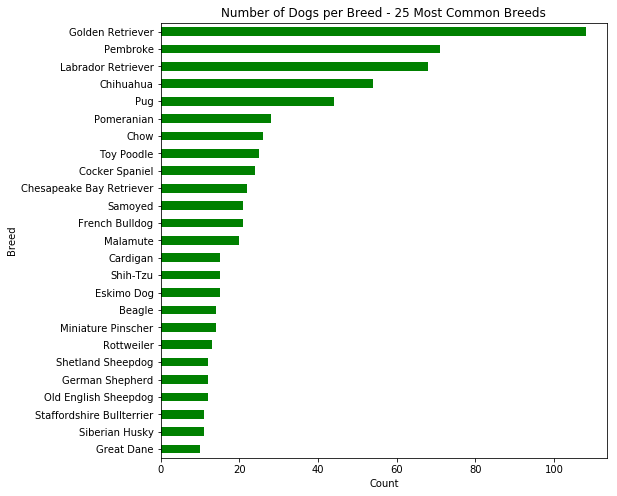

In [104]:
dog_counts = dog_tweets_final.breed.value_counts().nlargest(25).sort_values()
plot1 = dog_counts.plot(kind='barh', color='green', figsize=(8,8), title='Number of Dogs per Breed - 25 Most Common Breeds')
plot1.set(xlabel="Count", ylabel="Breed")
plt.savefig('breed_freq.jpg', bbox_inches='tight');

From this plot, we see that the Golden Retriever is the most common breed to be submitted.

### 2.  Which is the most well-liked breed?

The Golden Retriever may be the most common breed, but is it the one that receives the most favorites and retweets?  To look at which is the most well-liked breed, we can look at the average number of favorites and retweets that each breed received.

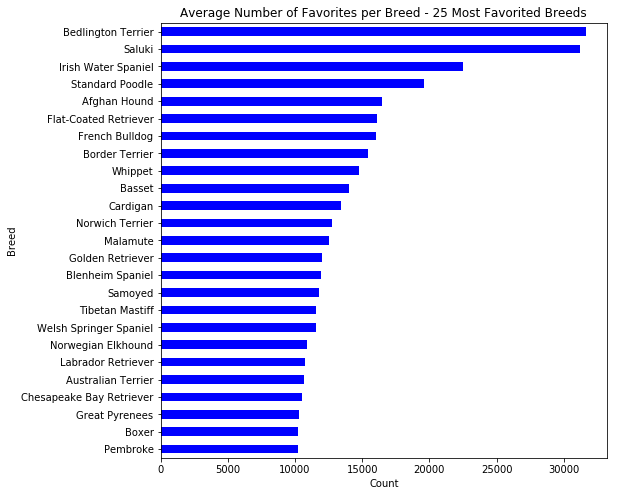

In [105]:
fav_mean = dog_tweets_final.groupby(['breed'], as_index=False)['favorite_count'].mean()
fav_mean = fav_mean.set_index('breed')
fav_sort = fav_mean.favorite_count.nlargest(25).sort_values()
plot2 = fav_sort.plot(kind='barh', color='blue', figsize=(8,8), title='Average Number of Favorites per Breed - 25 Most Favorited Breeds')
plot2.set(xlabel="Count", ylabel="Breed")
plt.savefig('fav_freq.jpg', bbox_inches='tight');

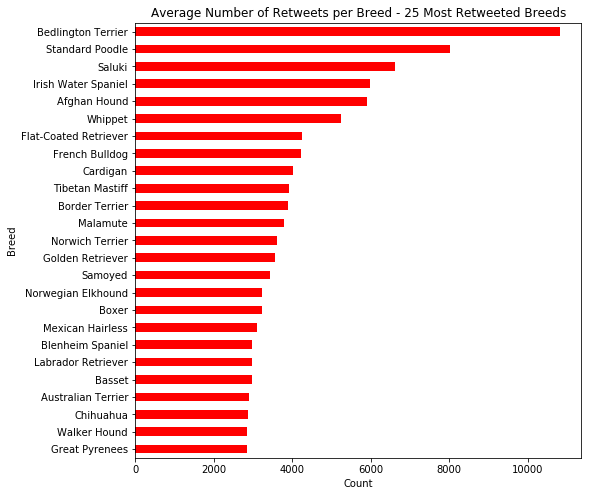

In [106]:
retweet_mean = dog_tweets_final.groupby(['breed'], as_index=False)['retweet_count'].mean()
retweet_mean = retweet_mean.set_index('breed')
retweet_sort = retweet_mean.retweet_count.nlargest(25).sort_values()
plot3 = retweet_sort.plot(kind='barh', color='red', figsize=(8,8),title='Average Number of Retweets per Breed - 25 Most Retweeted Breeds')
plot3.set(xlabel="Count", ylabel="Breed")
plt.savefig('retweet_freq.jpg', bbox_inches='tight');

Looking at these initial plots, we see that the Bedlington Terrier has the most retweets and favorites, when averaged across all of the Bedlington Terrier submissions.  However, it may be useful to look at the distribution of Bedlington Terrier favorites when compared to, for instance, the common Golden Retriever.

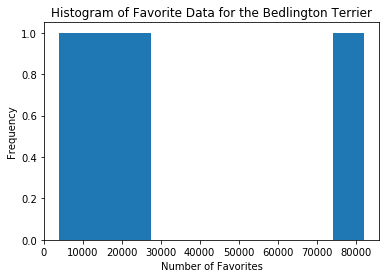

In [107]:
plot4 = dog_tweets_final[dog_tweets_final.breed=='Bedlington Terrier']['favorite_count'].plot(kind='hist', title='Histogram of Favorite Data for the Bedlington Terrier')
plot4.set(xlabel="Number of Favorites", ylabel="Frequency")
plt.savefig('bedlington.jpg', bbox_inches='tight');

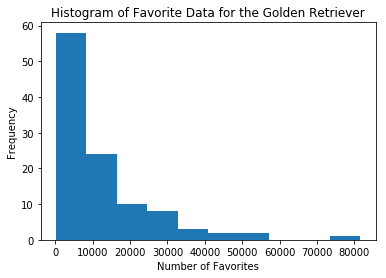

In [108]:
plot5 = dog_tweets_final[dog_tweets_final.breed=='Golden Retriever']['favorite_count'].plot(kind='hist', title='Histogram of Favorite Data for the Golden Retriever')
plot5.set(xlabel="Number of Favorites", ylabel="Frequency")
plt.savefig('golden.jpg', bbox_inches='tight');

Here, we see that there are only three Bedlington Terrier submissions, and one single submission is much higher than the other two.  By contrast, there is also one very high Golden Retriever submission, but it is hidden in the large number of submissions that receive fewer than 10000 favorites.

So, let's look at the favorites and the retweets:

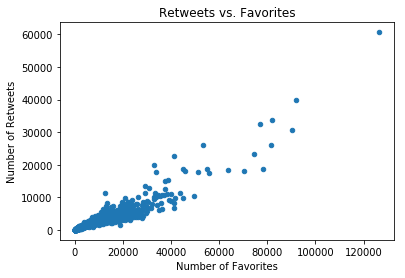

In [109]:
plot6 = dog_tweets_final.plot(x='favorite_count',y='retweet_count', kind='scatter', title='Retweets vs. Favorites');
plot6.set(xlabel="Number of Favorites", ylabel="Number of Retweets");

This shows us that while most of the dogs have a favorite and retweet count below ~40000 favorites and ~10000 retweets, there are some outliers that received well more than that.  So let's look at the 95th percentile for both favorites and retweets:

In [110]:
dog_tweets_final.favorite_count.quantile(0.95)

28894.599999999926

In [111]:
dog_tweets_final.retweet_count.quantile(0.95)

8133.799999999994

If we restrict our data to those in the bottom 95th percentile, we see a different picture of which dog is most well-liked:

In [112]:
dog_tweets_sub = dog_tweets_final[dog_tweets_final.favorite_count < 28895]
dog_tweets_sub = dog_tweets_final[dog_tweets_final.retweet_count < 8134]

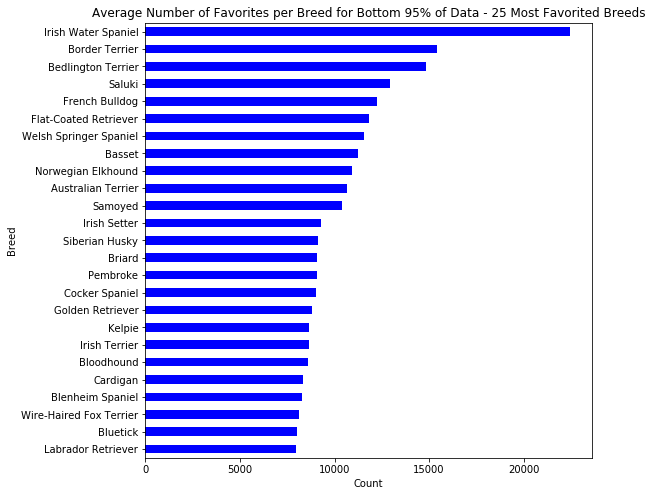

In [113]:
sub_fav = dog_tweets_sub.groupby(['breed'], as_index=False)['favorite_count'].mean()
sub_fav = sub_fav.set_index('breed')
sub_fav_sort = sub_fav.favorite_count.nlargest(25).sort_values()
plot7 = sub_fav_sort.plot(kind='barh', color='blue', figsize=(8,8), title='Average Number of Favorites per Breed for Bottom 95% of Data - 25 Most Favorited Breeds')
plot7.set(xlabel="Count", ylabel="Breed")
plt.savefig('fav_freq_95.jpg', bbox_inches='tight');

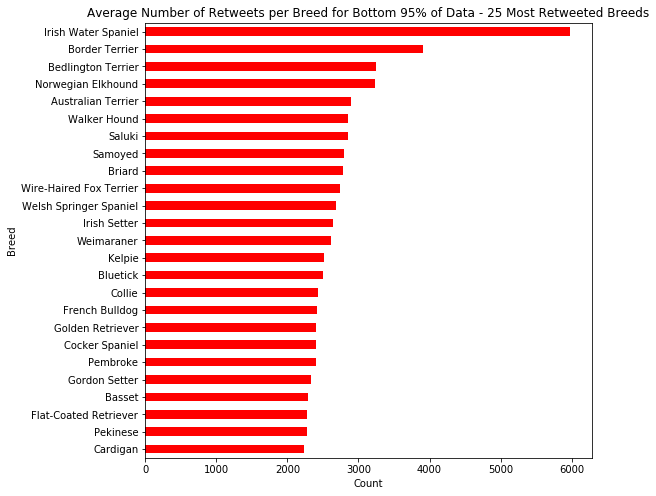

In [114]:
sub_retweet = dog_tweets_sub.groupby(['breed'], as_index=False)['retweet_count'].mean()
sub_retweet = sub_retweet.set_index('breed')
sub_retweet_sort = sub_retweet.retweet_count.nlargest(25).sort_values()
plot8 = sub_retweet_sort.plot(kind='barh', color='red', figsize=(8,8), title='Average Number of Retweets per Breed for Bottom 95% of Data - 25 Most Retweeted Breeds')
plot8.set(xlabel="Count", ylabel="Breed")
plt.savefig('retweet_freq_95.jpg', bbox_inches='tight');

Without that one extremely high value, the Bedlington Terrier falls down a few spots.

For completeness, let's look at the distribution of the Irish Water Spaniel:

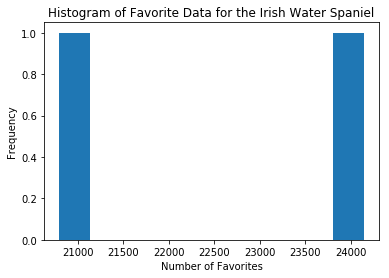

In [115]:
plot9 = dog_tweets_final[dog_tweets_final.breed=='Irish Water Spaniel']['favorite_count'].plot(kind='hist', title='Histogram of Favorite Data for the Irish Water Spaniel')
plot9.set(xlabel="Number of Favorites", ylabel="Frequency")
plt.savefig('irish.jpg', bbox_inches='tight');

Again, we only see a small number of Irish Water Spaniels.  However, the values here are actually quite close to one another, rather than one being a high outlier.  

The data is hard to compare, in general, because of a low number of dogs for many breeds.  Looking at the 50th percentile for the value counts, for example:

In [116]:
dog_tweets_final.breed.value_counts().quantile(0.5)

6.0

Since the 50th percentile is only 6 dogs, that means that a large percentage of our breeds are only present in small numbers, making the mean favorite_count and retweet_count susceptible to variation from one large number. 

So we can say that the Bedlington Terrier is the most favorited and retweeted dog, on average, considering all dogs. The Irish Water Spaniel is the most favorited and retweeted dog, on average, eliminating the top 5% of dogs, but the Bedlington Terrier still remains in 3rd place.  

Because the Bedlington Terrier is so high on both lists, I think that it can be crowned the "most well-liked dog"

### 3.  How have favorites and retweets varied over time?

This is effectively a measure of the popularity of the WeRateDogs twitter feed, with time.

To begin with, we can look at the number of tweets, per month, per year:

In [117]:
dog_tweets_final['year'] = dog_tweets_final['timestamp'].dt.year
dog_tweets_final['month'] = dog_tweets_final['timestamp'].dt.month

In [118]:
df2 = dog_tweets_final.groupby(['year','month']).sum()

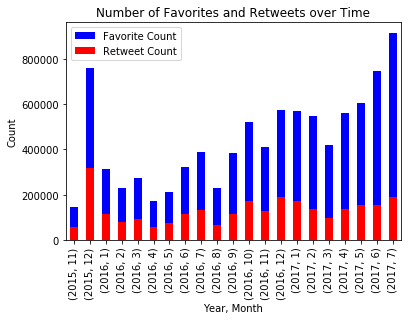

In [119]:
plot10 = df2['favorite_count'].plot(kind='bar', color='blue', title='Number of Favorites and Retweets over Time')
plot11 = df2['retweet_count'].plot(kind='bar', color='red')
plot10.set(xlabel="Year, Month", ylabel="Count")
plot10.legend(['Favorite Count','Retweet Count'])
plt.savefig('num_fav.jpg', bbox_inches='tight');

From here, we see that we have a big uptick in favorites and retweets in the second month of our data, but that overall, the number of favorites and retweets trends upwards.  What makes this big peak in December of 2015?  Let's look at the number of tweets:

In [120]:
df3 = dog_tweets_final.groupby(['year','month']).count()

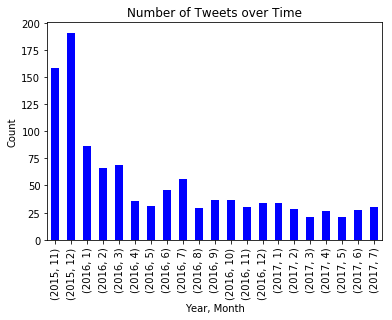

In [121]:
plot12 = df3['favorite_count'].plot(kind='bar', color='blue', title='Number of Tweets over Time')
plot12.set(xlabel="Year, Month", ylabel="Count")
plt.savefig('num_tweets.jpg', bbox_inches='tight');

The number of tweets has tapered off over time, with the most in the first two months of data.  So, since the highest numbers of favorites and retweets occur in the months with the highest number of tweets, perhaps the mean favorite and retweet counts are more important:

In [122]:
df4 = dog_tweets_final.groupby(['year','month']).mean()

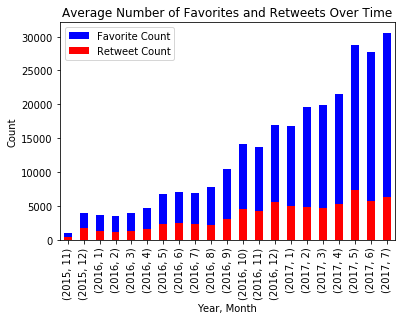

In [123]:
plot13 = df4['favorite_count'].plot(kind='bar', color='blue', title='Average Number of Favorites and Retweets Over Time')
plot14 = df4['retweet_count'].plot(kind='bar', color='red')
plot13.set(xlabel="Year, Month", ylabel="Count")
plot13.legend(['Favorite Count','Retweet Count'])
plt.savefig('num_fav_avg.jpg', bbox_inches='tight');

From this, we see that the average number of favorites and retweets has gone up consistently over time.  So fewer dogs are being posted, but this would seem to imply that the feed has more followers, since more people either favorite or retweet each post, which would imply that they are overall more popular.